# ISOCHRONES on CoCalc in Python 3

https://isochrones.readthedocs.io/en/latest/

Data globally stored in `$ISOCHRONES`

command line:

1. `unset DISPLAY`
2. `import matplotlib; matplotlib.use('agg')`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sep, astroalign
import ccdproc

%matplotlib inline

In [2]:
import sys
sys.executable

'/usr/bin/python3'

In [3]:
sys.version

'3.6.9 (default, Jul 17 2020, 12:50:27) \n[GCC 8.4.0]'

In [4]:
import isochrones
isochrones

PyMultiNest not imported.  MultiNest fits will not work.


<module 'isochrones' from '/usr/local/lib/python3.6/dist-packages/isochrones/__init__.py'>

In [5]:
isochrones.__version__

'2.1'

In [6]:
from isochrones import get_ichrone
iso = get_ichrone('mist', bands=['Bessell_B', 'Bessell_V'])

In [10]:
ages = np.linspace(1.4e9, 2e9, 5)

In [11]:
model = iso.isochrone(9.0)

In [12]:
model

eep  age       feh      mass  initial_mass    radius        density  \
195    195.0  9.0  0.042814  0.108103      0.108103  0.133343      64.280348   
196    196.0  9.0  0.042824  0.112932      0.112932  0.137791      60.856285   
197    197.0  9.0  0.042834  0.117543      0.117544  0.142177      57.658212   
198    198.0  9.0  0.042846  0.122402      0.122402  0.146956      54.371989   
199    199.0  9.0  0.042858  0.127100      0.127100  0.151731      51.294654   
...      ...  ...       ...       ...           ...       ...            ...   
1705  1705.0  9.0  0.105188  0.605796      2.316544  0.014040  308587.523160   
1706  1706.0  9.0  0.105003  0.605877      2.317335  0.014000  311248.361569   
1707  1707.0  9.0  0.104796  0.605967      2.318217  0.013962  313901.847291   
1708  1708.0  9.0  0.104563  0.606069      2.319217  0.013923  316553.082774   
1709  1709.0  9.0  0.104311  0.606173      2.320378  0.013884  319320.086230   

       logTeff          Teff      logg      logL       Mbol      delta_nu  \
195   3.465890   2923.411541  5.216743 -2.931855  12.069637    998.429682   
196   3.469256   2946.160133  5.205249 -2.889887  11.964717    970.463953   
197   3.472471   2968.048014  5.194272 -2.849811  11.864529    943.753111   
198   3.475860   2991.303471  5.182666 -2.807536  11.758839    915.533478   
199   3.479138   3013.966420  5.171438 -2.766651  11.656627    888.236405   
...        ...           ...       ...       ...        ...           ...   
1705  4.440269  27559.329600  7.925739 -0.989547   7.213867  55107.948111   
1706  4.432439  27066.955047  7.928245 -1.023311   7.298277  55387.362413   
1707  4.424611  26583.439865  7.930724 -1.057039   7.382597  55665.379255   
1708  4.416787  26108.776976  7.933184 -1.090724   7.466809  55942.797526   
1709  4.408754  25630.313721  7.935728 -1.125324   7.553311  56232.374842   

            nu_max  phase   dm_deep  Bessell_B_mag  Bessell_V_mag  
195   2.633932e+04   -1.0  0.004742      17.092496      15.494296  
196   2.562296e+04   -1.0  0.004720      16.860383      15.281213  
197   2.493869e+04   -1.0  0.004735      16.637645      15.076675  
198   2.421504e+04   -1.0  0.004778      16.401555      14.859815  
199   2.351493e+04   -1.0  0.004716      16.192865      14.664382  
...            ...    ...       ...            ...            ...  
1705  4.361877e+06    6.0  0.000746       9.823777       9.995557  
1706  4.426862e+06    6.0  0.000837       9.872569      10.038028  
1707  4.492508e+06    6.0  0.000941       9.921914      10.081159  
1708  4.558895e+06    6.0  0.001080       9.971796      10.124933  
1709  4.628347e+06    6.0  0.001274      10.023696      10.170668  

[1515 rows x 18 columns]

In [13]:
model_bvs = []
model_vs = []
labels = []
for age in ages:
    model = iso.isochrone(np.log10(age))
    model_b = model.Bessell_B_mag
    model_v = model.Bessell_V_mag
    model_bv = model_b - model_v
    model_vs.append(model_v)
    model_bvs.append(model_bv)
    labels.append('{:.2f} Gyr'.format(age/1e9))

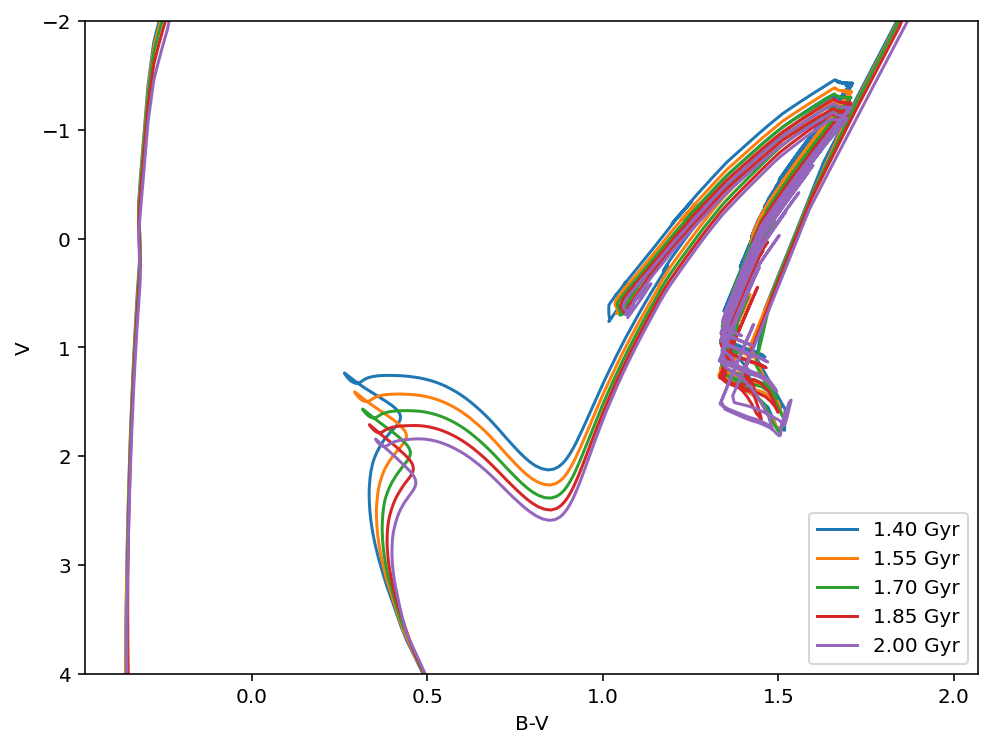

In [14]:
fig, axis = plt.subplots(figsize=(8,6))
axis.set_xlabel('B-V')
axis.set_ylabel('V')
for label, v, bv in zip(labels, model_vs, model_bvs):
    axis.plot(bv, v, label=label)
axis.legend()
axis.set_ylim(-2,4)
axis.invert_yaxis()

plt.show()

In [15]:
import astroquery
astroquery.__version__

'0.4'

## dependencies section

In [16]:
import astroquery
astroquery.__version__

'0.4'

In [19]:
## uses too much memory?!

from isochrones.mist import MIST_Isochrone
mist = MIST_Isochrone()
mist.radius(1.0, 9.7, 0.0)

array(nan)

In [20]:
! ls -lh /ext/data/isochrones/mist/

total 1.2G
drwxr-xr-x 1 salvus salvus 1.4K Oct 14 09:05 MIST_v1.2_vvcrit0.4_full_isos
-rw-r--r-- 1 salvus salvus 661M Sep 29 11:40 MIST_v1.2_vvcrit0.4_full_isos.txz
-rw-r--r-- 1 salvus salvus  18M Oct 28 10:48 dm_deep_v1.2_vvcrit0.4_full_isos.h5
-rw-r--r-- 1 salvus salvus 336M Oct 28 10:48 full_grid_v1.2_vvcrit0.4_full_isos.npz
-rw-r--r-- 1 salvus salvus 177M Oct  8 18:02 mist_v1.2_vvcrit0.4_full_isos.h5
drwxr-xr-x 1 salvus salvus 1.3K Oct 13 23:25 tracks


In [21]:
! ls -lh /ext/data/isochrones/BC/mist/

total 337M
-rw-r--r-- 1 salvus salvus  19M Oct  8 18:04 SDSSugriz.h5
-rw-r--r-- 1 salvus salvus 1.8M Oct  8 18:04 SDSSugriz.txz
-rw-r--r-- 1 salvus salvus  71M Oct  8 18:04 UBVRIplus.h5
-rw-r--r-- 1 salvus salvus 8.5M Oct  8 18:04 UBVRIplus.txz
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm025.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm025.UBVRIplus
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm050.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm050.UBVRIplus
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm075.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm075.UBVRIplus
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm100.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm100.UBVRIplus
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm125.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm125.UBVRIplus
-rw-rw-r-- 1 salvus salvus 3.0M Apr 16  2016 fehm150.SDSSugriz
-rw-rw-r-- 1 salvus salvus  11M Feb  5  2019 fehm150.UBVRIplus